In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=10,10

%matplotlib inline


In [8]:
Training_data = pd.read_csv(r"C:\Users\BijayNayak\Desktop\Bigdata\Tutorial\Challenge\challenge_dataSet_attachments\Training_data.xls")
#print(Training_data.head())
print(Training_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 31 columns):
ID                                     148 non-null int64
Sector                                 148 non-null object
Year                                   148 non-null int64
Month                                  148 non-null object
Cereals and products                   148 non-null float64
Meat and fish                          148 non-null float64
Egg                                    148 non-null float64
Milk and products                      148 non-null float64
Oils and fats                          148 non-null float64
Fruits                                 148 non-null float64
Vegetables                             148 non-null float64
Pulses and products                    148 non-null float64
Sugar and Confectionery                148 non-null float64
Spices                                 148 non-null float64
Non-alcoholic beverages                148 non-null float64
P

In [9]:
print(Training_data.columns)
#print(Training_data.describe())
print(Training_data.shape)


Index(['ID', 'Sector', 'Year', 'Month', 'Cereals and products',
       'Meat and fish', 'Egg', 'Milk and products', 'Oils and fats', 'Fruits',
       'Vegetables', 'Pulses and products', 'Sugar and Confectionery',
       'Spices', 'Non-alcoholic beverages',
       'Prepared meals, snacks, sweets etc.', 'Food and beverages',
       'Pan, tobacco and intoxicants', 'Clothing', 'Footwear',
       'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')
(148, 31)


In [10]:
Training_data= Training_data.drop(columns=['ID','Sector','Year','Month'])
print(Training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 27 columns):
Cereals and products                   148 non-null float64
Meat and fish                          148 non-null float64
Egg                                    148 non-null float64
Milk and products                      148 non-null float64
Oils and fats                          148 non-null float64
Fruits                                 148 non-null float64
Vegetables                             148 non-null float64
Pulses and products                    148 non-null float64
Sugar and Confectionery                148 non-null float64
Spices                                 148 non-null float64
Non-alcoholic beverages                148 non-null float64
Prepared meals, snacks, sweets etc.    148 non-null float64
Food and beverages                     148 non-null float64
Pan, tobacco and intoxicants           148 non-null float64
Clothing                               148 non-null flo

In [11]:
Training_data.describe()

,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,Pulses and products,Sugar and Confectionery,Spices,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,98.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,122.511486,126.141216,120.418919,122.438514,109.690541,124.281757,140.460135,134.413514,102.193919,122.066892,...,116.991837,116.189189,117.966892,115.670946,110.891892,114.582432,119.439865,111.798649,114.562162,120.164189
std,5.677159,9.391058,7.390381,9.676668,5.413015,10.479212,20.738209,28.510508,6.983121,12.783857,...,8.290719,6.720869,7.547711,7.003588,3.431021,6.553461,9.014288,5.789011,5.913945,7.855922
min,107.500000,106.300000,102.700000,103.600000,101.100000,102.300000,101.400000,103.500000,85.300000,101.800000,...,100.300000,105.400000,104.800000,104.000000,103.200000,102.900000,103.500000,102.100000,103.700000,104.000000
25%,119.750000,119.050000,115.550000,114.025000,105.300000,115.075000,126.925000,108.900000,97.800000,110.650000,...,111.600000,111.500000,112.250000,110.250000,109.300000,109.675000,111.600000,108.175000,110.575000,114.425000
50%,123.450000,125.500000,120.600000,125.100000,109.000000,127.450000,140.650000,119.600000,102.050000,121.850000,...,117.300000,114.950000,118.100000,115.200000,111.200000,114.450000,119.950000,110.750000,114.050000,120.300000
75%,125.750000,134.325000,125.625000,129.825000,113.500000,132.525000,156.825000,165.325000,105.000000,133.225000,...,123.400000,121.300000,123.750000,121.250000,112.925000,119.825000,126.525000,115.225000,118.875000,126.600000
max,133.300000,144.200000,136.600000,137.200000,122.100000,140.200000,192.800000,191.600000,117.300000,145.500000,...,129.600000,133.200000,133.600000,130.100000,119.500000,127.700000,134.900000,123.500000,127.000000,133.800000


In [12]:
#print(Training_data.isnull().sum()/100)
print(Training_data['Housing'].isnull().sum()/100)


0.5


In [13]:
#(say 0.01–0.5% of our data). Percent is just a rule of thumb.
Training_data=Training_data.dropna()
#print(Training_data.info())
print(Training_data.shape)


(98, 27)


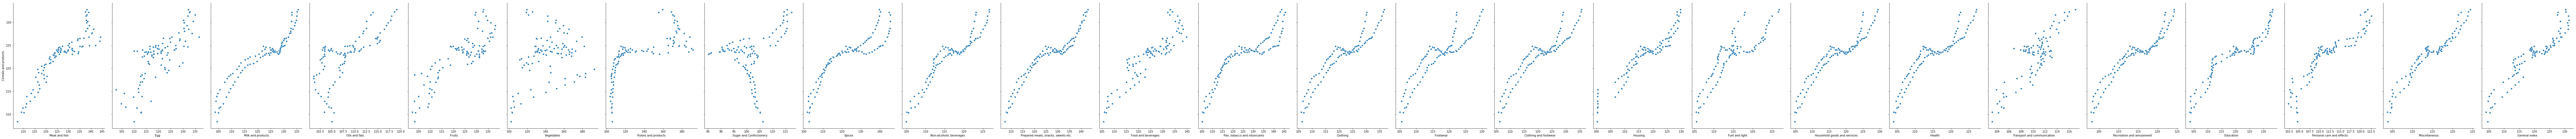

In [14]:

sns.pairplot(Training_data, x_vars=['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants', 'Clothing','Footwear','Clothing and footwear','Housing','Fuel and light','Household goods and services', 'Health', 'Transport and communication','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index'], y_vars='Cereals and products',height=7, aspect=0.7, kind='scatter')
plt.show()

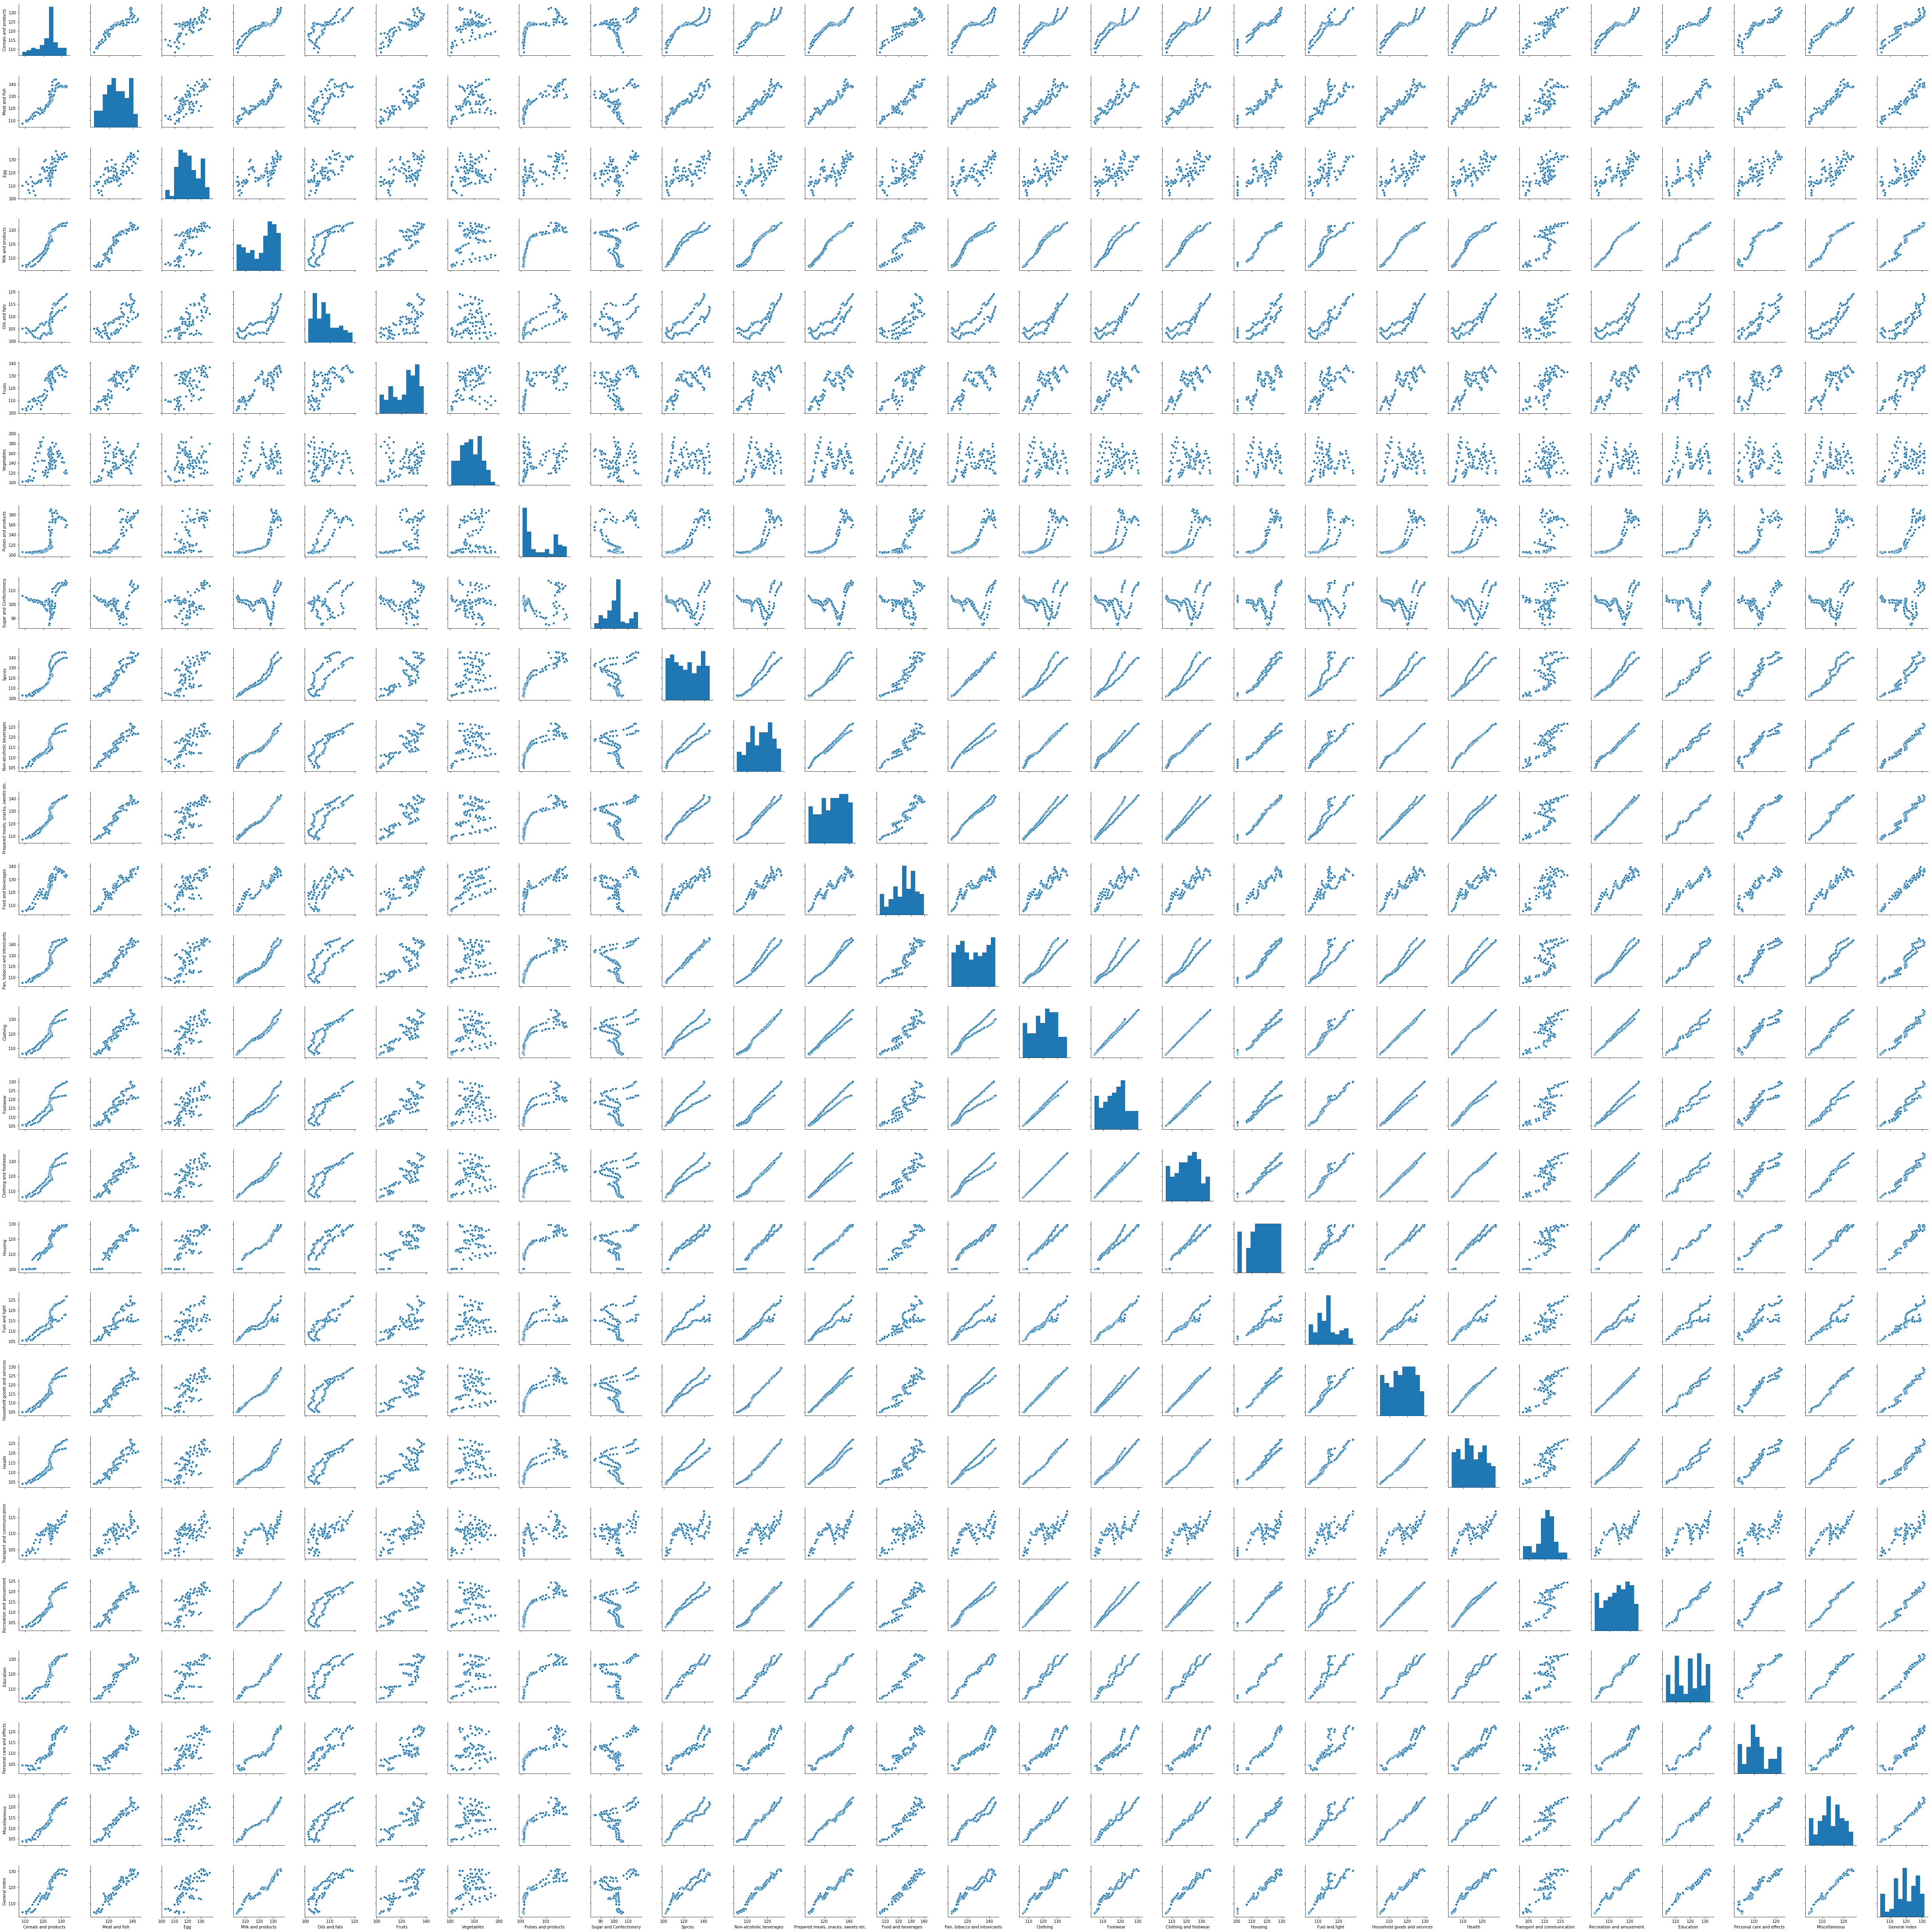

In [15]:
sns.pairplot(Training_data)

(98, 27)


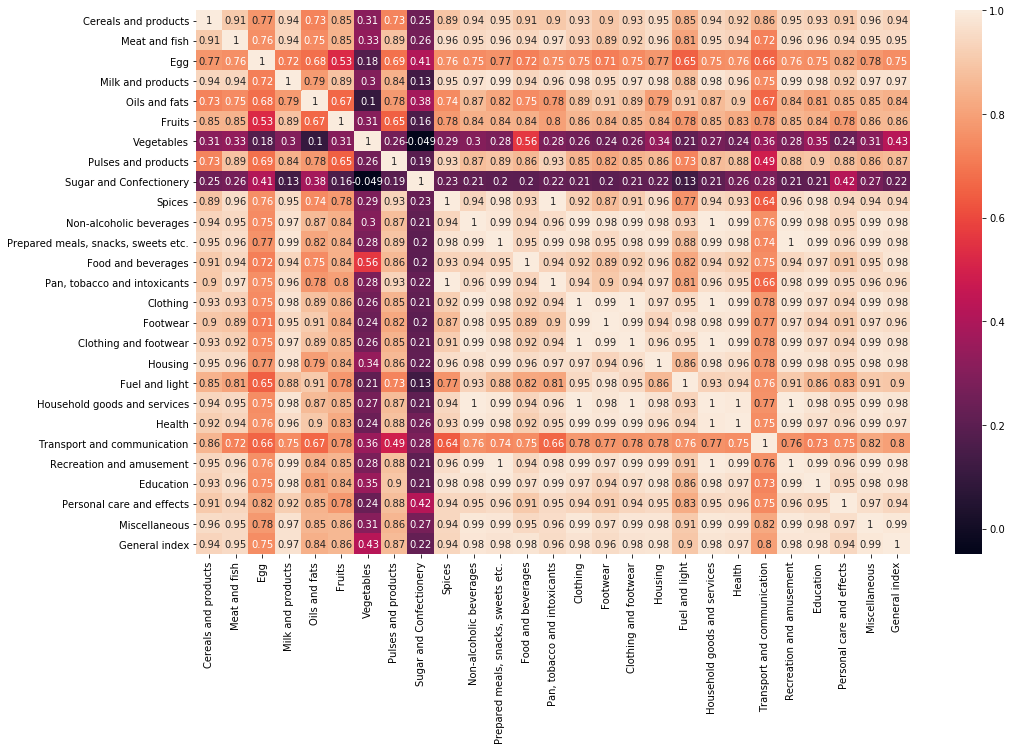

In [16]:
plt.figure(figsize = (16,10))
sns.heatmap(Training_data.corr(),annot = True)
print(Training_data.shape)

In [17]:
#split the data set for the prediction 
# Putting feature variable to X
X = Training_data[['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants', 'Clothing','Footwear','Clothing and footwear','Housing','Fuel and light','Household goods and services', 'Health', 'Transport and communication','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index']]

# Putting response variable to y
y=Training_data['Cereals and products']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=1)
lm =LinearRegression()
lm.fit(X_train,y_train)



c:\users\bijaynayak\desktop\bigdata\programfiles\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#Model Evaluation
print(lm.intercept_)

-55.26360942525778


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Meat and fish,-0.259670
Egg,0.015077
Milk and products,-0.293123
Oils and fats,-0.131669
Fruits,-0.183767
Vegetables,-0.311390
Pulses and products,-0.163826
Sugar and Confectionery,-0.035958
Spices,-0.136075
Non-alcoholic beverages,0.595945


In [21]:
#Predictions
y_pred = lm.predict(X_test)

In [22]:
#Calculating Error Terms
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.16755506888638677
r_square_value : 0.9895167498216697


In [23]:
#testing for the P:value 
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm=sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()
lm_1.params

c:\users\bijaynayak\desktop\bigdata\programfiles\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                                 -55.263609
Meat and fish                          -0.259670
Egg                                     0.015077
Milk and products                      -0.293123
Oils and fats                          -0.131669
Fruits                                 -0.183767
Vegetables                             -0.311390
Pulses and products                    -0.163826
Sugar and Confectionery                -0.035958
Spices                                 -0.136075
Non-alcoholic beverages                 0.595945
Prepared meals, snacks, sweets etc.    -0.181364
Food and beverages                      3.347967
Pan, tobacco and intoxicants           -0.116421
Clothing                               -0.466304
Footwear                                0.237459
Clothing and footwear                  -0.123769
Housing                                 0.247761
Fuel and light                          0.020032
Household goods and services           -0.613781
Health              

In [24]:
print(lm_1.summary())

                             OLS Regression Results                             
Dep. Variable:     Cereals and products   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                     1145.
Date:                  Fri, 28 Jun 2019   Prob (F-statistic):           6.07e-51
Time:                          14:41:17   Log-Likelihood:                 11.146
No. Observations:                    68   AIC:                             31.71
Df Residuals:                        41   BIC:                             91.63
Df Model:                            26                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [41]:
#New Data set after removing the multicollinearity 
X_train_new= X_train[['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants','Housing','Household goods and services', 'Health','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index']]
#Removed Egg
#X_train_new= X_train[['Meat and fish','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants','Housing','Household goods and services', 'Health','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index']]
X_test_new= X_test[['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants','Housing','Household goods and services', 'Health','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index']]


In [26]:
lm.fit(X_train_new,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred_new = lm.predict(X_test_new)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.14988565001267715
r_square_value : 0.9906222546553337
(30,)
(30,)


Text(0, 0.5, 'Cereals and products')

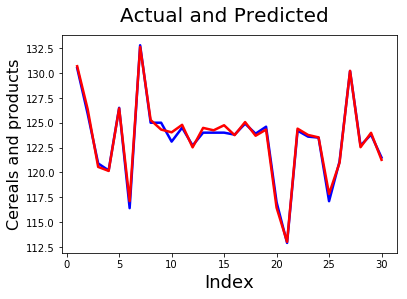

In [54]:
#Actual vs Predicted
c = [i for i in range(1,31,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Cereals and products', fontsize=16)                               # Y-label

In [35]:
sample_test_data= pd.read_csv(r"C:\Users\BijayNayak\Desktop\Bigdata\Tutorial\Challenge\challenge_dataSet_attachments\Test_data.xls")
#sample_test_data.info()
print(sample_test_data.isnull().sum()/100)
sample_test_data=sample_test_data.dropna()


ID                                     0.00
Sector                                 0.00
Year                                   0.00
Month                                  0.00
Meat and fish                          0.00
Egg                                    0.00
Milk and products                      0.00
Oils and fats                          0.00
Fruits                                 0.00
Vegetables                             0.00
Pulses and products                    0.00
Sugar and Confectionery                0.00
Spices                                 0.00
Non-alcoholic beverages                0.00
Prepared meals, snacks, sweets etc.    0.00
Food and beverages                     0.00
Pan, tobacco and intoxicants           0.00
Clothing                               0.00
Footwear                               0.00
Clothing and footwear                  0.00
Housing                                0.14
Fuel and light                         0.00
Household goods and services    

In [36]:
sample_test_data_new=sample_test_data[['Meat and fish','Egg','Milk and products','Oils and fats','Fruits','Vegetables', 'Pulses and products', 'Sugar and Confectionery','Spices','Non-alcoholic beverages','Prepared meals, snacks, sweets etc.','Food and beverages','Pan, tobacco and intoxicants','Housing','Household goods and services', 'Health','Recreation and amusement','Education','Personal care and effects','Miscellaneous', 'General index']]
sample_test_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 42
Data columns (total 21 columns):
Meat and fish                          29 non-null float64
Egg                                    29 non-null float64
Milk and products                      29 non-null float64
Oils and fats                          29 non-null float64
Fruits                                 29 non-null float64
Vegetables                             29 non-null float64
Pulses and products                    29 non-null float64
Sugar and Confectionery                29 non-null float64
Spices                                 29 non-null float64
Non-alcoholic beverages                29 non-null float64
Prepared meals, snacks, sweets etc.    29 non-null float64
Food and beverages                     29 non-null float64
Pan, tobacco and intoxicants           29 non-null float64
Housing                                29 non-null float64
Household goods and services           29 non-null float64
Health      

In [32]:
y_test_new= lm.predict(sample_test_data_new)
y_test_new

array([132.80847564, 133.02170152, 133.42077292, 132.70408693,
       133.33824295, 132.23965575, 133.3114809 , 132.73691374,
       133.57504623, 133.32486113, 134.25501551, 133.93692807,
       135.10623607, 133.73353397, 135.232008  , 134.03837136,
       135.69755103, 134.40180415, 136.67194922, 134.77453548,
       135.96997005, 134.89893545, 136.59643803, 134.7648985 ,
       136.55115614, 134.974693  , 137.1552075 , 135.61139789,
       137.30386769])

In [34]:
np.round(y_test_new,2)

array([132.81, 133.02, 133.42, 132.7 , 133.34, 132.24, 133.31, 132.74,
       133.58, 133.32, 134.26, 133.94, 135.11, 133.73, 135.23, 134.04,
       135.7 , 134.4 , 136.67, 134.77, 135.97, 134.9 , 136.6 , 134.76,
       136.55, 134.97, 137.16, 135.61, 137.3 ])